In [1]:
# import libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Understanding and Cleaning

In [2]:
data_set = pd.read_csv("F:\Data Analyst Roadmap\Inrenship\Pakistan Suicide Bombing Attacks EDA (Golden Proejct 1)\Suicide_bombing_attacks.csv")

In [3]:
data_set

Date                   Islamic Date Blast Day Type  \
0     Sunday-November 19-1995  25 Jumaada al-THaany 1416 A.H        Holiday   
1      Monday-November 6-2000           10 SHa`baan 1421 A.H    Working Day   
2        Wednesday-May 8-2002              25 safar 1423 A.H    Working Day   
3         Friday-June 14-2002     3 Raby` al-THaany 1423 A.H    Working Day   
4          Friday-July 4-2003     4 Jumaada al-awal 1424 A.H    Working Day   
..                        ...                            ...            ...   
983       Monday-July-17-2017            22 Shawaal 1432 A.H    Working Day   
984       Monday-July-17-2017            22 Shawaal 1432 A.H    Working Day   
985       Monday-July-24-2017            29 Shawaal 1432 A.H    Working Day   
986   Saturday-August-12-2017                            NaN        Weekend   
987  Thursday-October-05-2017                            NaN            NaN   

    Holiday Type         Time       City   Latitude  Longitude     Province  \
0        Weekend          NaN  Islamabad  33.718000    73.0718      Capital   
1            NaN          NaN    Karachi  24.991800    66.9911        Sindh   
2            NaN      7:45 AM   Karachi   24.991800    66.9911        Sindh   
3            NaN  11:10:00 AM    Karachi  24.991800    66.9911        Sindh   
4            NaN          NaN     Quetta  30.209500    67.0182  Baluchistan   
..           ...          ...        ...        ...        ...          ...   
983          NaN          NaN   Peshawar  34.015000    71.5805          KPK   
984          NaN          NaN   Peshawar  34.015000    71.5805          KPK   
985          NaN       3:55pm     Lahore  31.500875   74.33312       Punjab   
986          NaN       5:00PM     Quetta  30.203658  67.004469  Balochistan   
987          NaN          NaN     Quetta  28.571051  67.496895  Balochistan   

                                              Location  ...  \
0                                     Egyptian Embassy  ...   
1                                office of Nawa-e-Waqt  ...   
2    Pakistan Navy bus Parked outside Five Star She...  ...   
3                       US Consulate Civil Lines Area   ...   
4                       Imambargah MeCongy Road Quetta  ...   
..                                                 ...  ...   
983                             near the Afghan border  ...   
984                       southwestern Chaman province  ...   
985            near Arfa Karim IT Tower Ferozepur Road  ...   
986                                    Pishin bus stop  ...   
987             Fateh Pur Shrine in Jhal Magsi village  ...   

    Targeted Sect if any Killed Min Killed Max Injured Min Injured Max  \
0                    NaN       14.0       15.0         NaN          60   
1                    NaN        NaN        3.0         NaN           3   
2              Christian       13.0       15.0        20.0          40   
3              Christian        NaN       12.0         NaN          51   
4                 Shiite       44.0       47.0         NaN          65   
..                   ...        ...        ...         ...         ...   
983                  NaN        1.0        2.0         1.0           7   
984                  NaN        1.0        1.0         1.0           1   
985                  NaN       26.0       27.0        56.0          56   
986                  NaN       15.0       15.0        40.0          40   
987                  NaN       21.0       22.0        25.0         NaN   

    No. of Suicide Blasts  Explosive Weight (max)  \
0                     2.0                     NaN   
1                     1.0                     NaN   
2                     1.0                  2.5 Kg   
3                     1.0                     NaN   
4                     1.0                     NaN   
..                    ...                     ...   
983                   1.0                     NaN   
984                   1.0                     NaN   
985 

The dataset contains 988 entries and 25 columns, covering various aspects of suicide bombing attacks in Pakistan.  
- Date and Islamic Date of attacks
- City, Province, and Location
- Target Type, Killed Min/Max, Injured Min/Max
- No. of Suicide Blasts, Explosive Weight
- Geographical details: Latitude, Longitude
- Environmental factors: Temperature

There are missing values in several columns (e.g., Islamic Date, Time, Holiday Type, Hospital Names, etc.), so need to address them during data cleaning.

In [4]:
#info about the given data
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     988 non-null    object 
 1   Islamic Date             678 non-null    object 
 2   Blast Day Type           967 non-null    object 
 3   Holiday Type             144 non-null    object 
 4   Time                     566 non-null    object 
 5   City                     988 non-null    object 
 6   Latitude                 983 non-null    float64
 7   Longitude                983 non-null    object 
 8   Province                 988 non-null    object 
 9   Location                 982 non-null    object 
 10  Location Category        988 non-null    object 
 11  Location Sensitivity     988 non-null    object 
 12  Open/Closed Space        918 non-null    object 
 13  Influencing Event/Event  378 non-null    object 
 14  Target Type              9

In [5]:
#find missing values
data_set.isnull().sum()

Date                         0
Islamic Date               310
Blast Day Type              21
Holiday Type               844
Time                       422
City                         0
Latitude                     5
Longitude                    5
Province                     0
Location                     6
Location Category            0
Location Sensitivity         0
Open/Closed Space           70
Influencing Event/Event    610
Target Type                  0
Targeted Sect if any       794
Killed Min                 292
Killed Max                   0
Injured Min                262
Injured Max                 64
No. of Suicide Blasts      164
Explosive Weight (max)     647
Hospital Names             397
Temperature(C)              10
Temperature(F)              14
dtype: int64

In [6]:
total_missgin_values = data_set.isnull().sum().sum()
print('The Total Missing Values in the Data Set Are: ', total_missgin_values)

The Total Missing Values in the Data Set Are:  4937


In [7]:
#find missing vlaues in percentage 
data_set.isnull().sum() *100/len(data_set)

Date                        0.000000
Islamic Date               31.376518
Blast Day Type              2.125506
Holiday Type               85.425101
Time                       42.712551
City                        0.000000
Latitude                    0.506073
Longitude                   0.506073
Province                    0.000000
Location                    0.607287
Location Category           0.000000
Location Sensitivity        0.000000
Open/Closed Space           7.085020
Influencing Event/Event    61.740891
Target Type                 0.000000
Targeted Sect if any       80.364372
Killed Min                 29.554656
Killed Max                  0.000000
Injured Min                26.518219
Injured Max                 6.477733
No. of Suicide Blasts      16.599190
Explosive Weight (max)     65.485830
Hospital Names             40.182186
Temperature(C)              1.012146
Temperature(F)              1.417004
dtype: float64

In [8]:
#statistics description for numeric and float values
data_set.describe()

Latitude  Killed Min  Killed Max  Injured Min  No. of Suicide Blasts  \
count  983.000000   696.00000  988.000000   726.000000             824.000000   
mean    32.618279    14.79023   15.253138    31.498623               1.116505   
std      2.475619    17.61733   19.957268    38.656426               0.395625   
min     24.879503     0.00000    0.000000     0.000000               1.000000   
25%     31.823800     3.00000    3.000000     7.000000               1.000000   
50%     33.583300     8.00000    8.000000    20.000000               1.000000   
75%     34.004300    20.25000   18.000000    40.000000               1.000000   
max     35.383300   125.00000  148.000000   320.000000               4.000000   

       Temperature(C)  Temperature(F)  
count      978.000000      974.000000  
mean        21.093650       69.939612  
std          8.375656       15.081500  
min         -2.370000       27.734000  
25%         14.650000       58.282250  
50%         21.295000       70.331000  
75%         28.145000       82.499000  
max         44.000000      111.000000

# Handle Missing Values:

Greater than 50% missgin vales in the column, so drop the specific column. 

Holiday Type (85% missing)

Influencing Event/Event (62% missing)

Explosive Weight (max) (65% missing)

These columns will have to drop first 

In [9]:
data_set.drop(['Holiday Type', 'Influencing Event/Event', 'Explosive Weight (max)'], axis=1)

Date                   Islamic Date Blast Day Type  \
0     Sunday-November 19-1995  25 Jumaada al-THaany 1416 A.H        Holiday   
1      Monday-November 6-2000           10 SHa`baan 1421 A.H    Working Day   
2        Wednesday-May 8-2002              25 safar 1423 A.H    Working Day   
3         Friday-June 14-2002     3 Raby` al-THaany 1423 A.H    Working Day   
4          Friday-July 4-2003     4 Jumaada al-awal 1424 A.H    Working Day   
..                        ...                            ...            ...   
983       Monday-July-17-2017            22 Shawaal 1432 A.H    Working Day   
984       Monday-July-17-2017            22 Shawaal 1432 A.H    Working Day   
985       Monday-July-24-2017            29 Shawaal 1432 A.H    Working Day   
986   Saturday-August-12-2017                            NaN        Weekend   
987  Thursday-October-05-2017                            NaN            NaN   

            Time       City   Latitude  Longitude     Province  \
0            NaN  Islamabad  33.718000    73.0718      Capital   
1            NaN    Karachi  24.991800    66.9911        Sindh   
2        7:45 AM   Karachi   24.991800    66.9911        Sindh   
3    11:10:00 AM    Karachi  24.991800    66.9911        Sindh   
4            NaN     Quetta  30.209500    67.0182  Baluchistan   
..           ...        ...        ...        ...          ...   
983          NaN   Peshawar  34.015000    71.5805          KPK   
984          NaN   Peshawar  34.015000    71.5805          KPK   
985       3:55pm     Lahore  31.500875   74.33312       Punjab   
986       5:00PM     Quetta  30.203658  67.004469  Balochistan   
987          NaN     Quetta  28.571051  67.496895  Balochistan   

                                              Location Location Category  ...  \
0                                     Egyptian Embassy           Foreign  ...   
1                                office of Nawa-e-Waqt   Office Building  ...   
2    Pakistan Navy bus Parked outside Five Star She...             Hotel  ...   
3                       US Consulate Civil Lines Area            Foreign  ...   
4                       Imambargah MeCongy Road Quetta         Religious  ...   
..                                                 ...               ...  ...   
983                             near the Afghan border          Military  ...   
984                       southwestern Chaman province          Military  ...   
985            near Arfa Karim IT Tower Ferozepur Road           Unknown  ...   
986                                    Pishin bus stop           Unknown  ...   
987             Fateh Pur Shrine in Jhal Magsi village         Religious  ...   

    Target Type Targeted Sect if any Killed Min Killed Max  Injured Min  \
0     Foreigner                  NaN       14.0       15.0          NaN   
1         Media                  NaN        NaN        3.0          NaN   
2     Foreigner            Christian       13.0       15.0         20.0   
3     Foreigner            Christian        NaN       12.0          NaN   
4     Religious               Shiite       44.0       47.0          NaN   
..          ...                  ...        ...        ...          ...   
983    Military                  NaN        1.0        2.0          1.0   
984    Military                  NaN        1.0        1.0          1.0   
985      Police                  NaN       26.0       27.0         56.0   
986    Military                  NaN       15.0       15.0         40.0   
987    Civilian                  NaN       21.0       22.0         25.0   

     Injured Max  No. of Suicide Blasts  \
0             60                    2.0   
1              3                    1.0   
2             40                    1.0   
3             51                    1.0   
4             65                    1.0   
..           ...                    ...   
983            7                    1.0   
984            1                    1.0   
985           56      

For the "Islamic Date" column (with ~31.3% missing values), fill the missing values with a placeholder like 'Unknown'.

In [10]:
data_set['Islamic Date'].fillna('Unknown', inplace=True)
data_set['Islamic Date'].isnull().sum()

0

now 2.1% of values are missing in the "Blast Day Type" column.

Fill the missing values in the "Blast Day Type" column using mode method


In [11]:
data_set['Blast Day Type'].fillna(data_set['Blast Day Type'].mode()[0], inplace=True)

data_set['Blast Day Type'].isnull().sum()

0

For the "Time" column (with ~42.7% missing values)

Fill missing values with a placeholder like 'Unknown' or a default time like '00:00'.

I recommend using '00:00' as it keeps the time format consistent for analysis

In [12]:
data_set['Time'].fillna('00:00', inplace=True)
data_set['Time'].isnull().sum()

0

For Longitude and latitude values, we will use mean funtion because it's numeric data 

In [13]:
# first convert longitude column in numeric data type.
data_set['Longitude'] = pd.to_numeric(data_set['Longitude'], errors='coerce' )

In [14]:
# for longitude
data_set['Longitude'].fillna(data_set['Longitude'].mean(), inplace=True)

# for Latitude
data_set['Latitude'].fillna(data_set['Latitude'].mean(), inplace=True)

In [15]:
data_set['Longitude'].isnull().sum()

data_set['Latitude'].isnull().sum()

0

The "Location" column has only about 0.6% missing values,  fill the missing values with a placeholder like 'Unknown'.

In [16]:
data_set['Location'].fillna('Unknown', inplace=True)
data_set['Location'].isnull().sum()

0

In [17]:
# Open/Closed Space (7.1% missing): Fill missing values with a placeholder with 'Unknown'

data_set['Open/Closed Space'].fillna('Unknown', inplace=True)
data_set['Open/Closed Space'].isnull().sum()

0

In [18]:
data_set['Targeted Sect if any'].isnull().sum()

794

In [19]:
# Targeted Sect if any (80.4% missing): i will drop this column because it has a very high percentage of missing values.

data_set.drop(['Targeted Sect if any'], axis=1)

Date                   Islamic Date Blast Day Type  \
0     Sunday-November 19-1995  25 Jumaada al-THaany 1416 A.H        Holiday   
1      Monday-November 6-2000           10 SHa`baan 1421 A.H    Working Day   
2        Wednesday-May 8-2002              25 safar 1423 A.H    Working Day   
3         Friday-June 14-2002     3 Raby` al-THaany 1423 A.H    Working Day   
4          Friday-July 4-2003     4 Jumaada al-awal 1424 A.H    Working Day   
..                        ...                            ...            ...   
983       Monday-July-17-2017            22 Shawaal 1432 A.H    Working Day   
984       Monday-July-17-2017            22 Shawaal 1432 A.H    Working Day   
985       Monday-July-24-2017            29 Shawaal 1432 A.H    Working Day   
986   Saturday-August-12-2017                        Unknown        Weekend   
987  Thursday-October-05-2017                        Unknown    Working Day   

    Holiday Type         Time       City   Latitude  Longitude     Province  \
0        Weekend        00:00  Islamabad  33.718000  73.071800      Capital   
1            NaN        00:00    Karachi  24.991800  66.991100        Sindh   
2            NaN      7:45 AM   Karachi   24.991800  66.991100        Sindh   
3            NaN  11:10:00 AM    Karachi  24.991800  66.991100        Sindh   
4            NaN        00:00     Quetta  30.209500  67.018200  Baluchistan   
..           ...          ...        ...        ...        ...          ...   
983          NaN        00:00   Peshawar  34.015000  71.580500          KPK   
984          NaN        00:00   Peshawar  34.015000  71.580500          KPK   
985          NaN       3:55pm     Lahore  31.500875  74.333120       Punjab   
986          NaN       5:00PM     Quetta  30.203658  67.004469  Balochistan   
987          NaN        00:00     Quetta  28.571051  67.496895  Balochistan   

                                              Location  ... Target Type  \
0                                     Egyptian Embassy  ...   Foreigner   
1                                office of Nawa-e-Waqt  ...       Media   
2    Pakistan Navy bus Parked outside Five Star She...  ...   Foreigner   
3                       US Consulate Civil Lines Area   ...   Foreigner   
4                       Imambargah MeCongy Road Quetta  ...   Religious   
..                                                 ...  ...         ...   
983                             near the Afghan border  ...    Military   
984                       southwestern Chaman province  ...    Military   
985            near Arfa Karim IT Tower Ferozepur Road  ...      Police   
986                                    Pishin bus stop  ...    Military   
987             Fateh Pur Shrine in Jhal Magsi village  ...    Civilian   

    Killed Min Killed Max Injured Min Injured Max  No. of Suicide Blasts  \
0         14.0       15.0         NaN          60                    2.0   
1          NaN        3.0         NaN           3                    1.0   
2         13.0       15.0        20.0          40                    1.0   
3          NaN       12.0         NaN          51                    1.0   
4         44.0       47.0         NaN          65                    1.0   
..         ...        ...         ...         ...                    ...   
983        1.0        2.0         1.0           7                    1.0   
984        1.0        1.0         1.0           1                    1.0   
985       26.0       27.0        56.0          56                    1.0   
986       15.0       15.0        40.0          40                    1.0   
987       21.0       22.0        25.0         NaN                    1.0   

     Explosive Weight (max)  \
0                       NaN   
1                       NaN   
2                    2.5 Kg   
3                       NaN   
4                       NaN   
..                      ...   
983                     NaN   
984                     NaN   
985                     NaN   
986

In [20]:
# Killed Min (29.6% missing): Fill missing values with the median, it’s a numerical variable.
data_set['Killed Min'].fillna(data_set['Killed Min'].median(), inplace=True)

In [21]:
data_set['Killed Min'].isnull().sum()

0

In [22]:
# now use median fill missing values in Injured Min (26.5% missing),Injured Max (6.5% missing) columns

data_set['Injured Min'].fillna(data_set['Injured Min'].median(), inplace=True)

In [23]:
# first convert non-numeric values to NaN and then fill missing values.

data_set['Injured Max'] = pd.to_numeric(data_set['Injured Max'], errors='coerce')

In [24]:
data_set['Injured Max'].fillna(data_set['Injured Max'].median(), inplace=True)
data_set['Injured Max'].isnull().sum()

0

In [25]:
# Here i am going to fill all numeric variables sugin median 
data_set[['No. of Suicide Blasts', 'Temperature(C)', 'Temperature(F)']] = data_set[['No. of Suicide Blasts', 'Temperature(C)', 'Temperature(F)']].fillna(data_set[['No. of Suicide Blasts', 'Temperature(C)', 'Temperature(F)', 'Killed Min', 'Injured Min', 'Injured Max']].median())

In [26]:
data_set.isnull().sum()

Date                         0
Islamic Date                 0
Blast Day Type               0
Holiday Type               844
Time                         0
City                         0
Latitude                     0
Longitude                    0
Province                     0
Location                     0
Location Category            0
Location Sensitivity         0
Open/Closed Space            0
Influencing Event/Event    610
Target Type                  0
Targeted Sect if any       794
Killed Min                   0
Killed Max                   0
Injured Min                  0
Injured Max                  0
No. of Suicide Blasts        0
Explosive Weight (max)     647
Hospital Names             397
Temperature(C)               0
Temperature(F)               0
dtype: int64

In [27]:
data_set.drop(['Holiday Type', 'Influencing Event/Event', 'Explosive Weight (max)', 'Targeted Sect if any', 'Influencing Event/Event'], axis=1, inplace=True)

In [28]:
data_set.isnull().sum()

Date                       0
Islamic Date               0
Blast Day Type             0
Time                       0
City                       0
Latitude                   0
Longitude                  0
Province                   0
Location                   0
Location Category          0
Location Sensitivity       0
Open/Closed Space          0
Target Type                0
Killed Min                 0
Killed Max                 0
Injured Min                0
Injured Max                0
No. of Suicide Blasts      0
Hospital Names           397
Temperature(C)             0
Temperature(F)             0
dtype: int64

In [29]:
# fill missing values in 'Hospital Names' with 'Unknown'
data_set['Hospital Names'].fillna('Unknown', inplace=True)

In [30]:
data_set.isnull().sum()

Date                     0
Islamic Date             0
Blast Day Type           0
Time                     0
City                     0
Latitude                 0
Longitude                0
Province                 0
Location                 0
Location Category        0
Location Sensitivity     0
Open/Closed Space        0
Target Type              0
Killed Min               0
Killed Max               0
Injured Min              0
Injured Max              0
No. of Suicide Blasts    0
Hospital Names           0
Temperature(C)           0
Temperature(F)           0
dtype: int64

# convert date column to datetime, Set format of column date '%A-%b %d-%Y'

In [31]:
#convert date column to datetime
#Set format of column date '%A-%b %d-%Y'
data_set['Date'] = pd.to_datetime(data_set['Date'], format='%A-%b %d-%Y', errors = 'coerce')

In [32]:
data_set['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 988 entries, 0 to 987
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
108 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.8 KB


In [33]:
data_set['Date'].describe()

count                    108
mean     2012-03-08 00:53:20
min      2002-05-08 00:00:00
25%      2009-05-21 00:00:00
50%      2013-05-04 00:00:00
75%      2015-10-14 00:00:00
max      2016-09-16 00:00:00
Name: Date, dtype: object

Extract year and month from the date.

In [34]:
data_set['Year'] = data_set['Date'].dt.year
data_set['Month'] = data_set['Date'].dt.month

In [35]:
data_set.isnull().sum()

Date                     880
Islamic Date               0
Blast Day Type             0
Time                       0
City                       0
Latitude                   0
Longitude                  0
Province                   0
Location                   0
Location Category          0
Location Sensitivity       0
Open/Closed Space          0
Target Type                0
Killed Min                 0
Killed Max                 0
Injured Min                0
Injured Max                0
No. of Suicide Blasts      0
Hospital Names             0
Temperature(C)             0
Temperature(F)             0
Year                     880
Month                    880
dtype: int64

The missing values in the 'Date' column likely occurred because some date entries couldn't be converted to the correct datetime format during the conversion process.

In [36]:
data_set['Date'] = pd.to_datetime(data_set['Date'], errors='coerce' )

In [37]:
data_set['Date'].isnull().sum()

880

In [38]:
# Now Fill missing dates with a placeholder 
data_set['Date'].fillna('Unknown', inplace=True)
data_set['Year'].fillna('Unknown', inplace=True)
data_set['Month'].fillna('Unknown', inplace=True)

In [39]:
data_set.isnull().sum()

Date                     0
Islamic Date             0
Blast Day Type           0
Time                     0
City                     0
Latitude                 0
Longitude                0
Province                 0
Location                 0
Location Category        0
Location Sensitivity     0
Open/Closed Space        0
Target Type              0
Killed Min               0
Killed Max               0
Injured Min              0
Injured Max              0
No. of Suicide Blasts    0
Hospital Names           0
Temperature(C)           0
Temperature(F)           0
Year                     0
Month                    0
dtype: int64

# ----------------------------------------------------------------------------------------------------

# Exploratory Data Analysis (EDA) – Trends & Patterns

In [40]:
import matplotlib.pyplot as plt

In [41]:
data_set['Year'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 988 entries, 0 to 987
Series name: Year
Non-Null Count  Dtype 
--------------  ----- 
988 non-null    object
dtypes: object(1)
memory usage: 7.8+ KB


In [42]:
# For visualization convert 'Year' column to numeric, coercing errors (non-numeric entries) to NaN
data_set['Year'] = pd.to_numeric(data_set['Year'], errors='coerce')

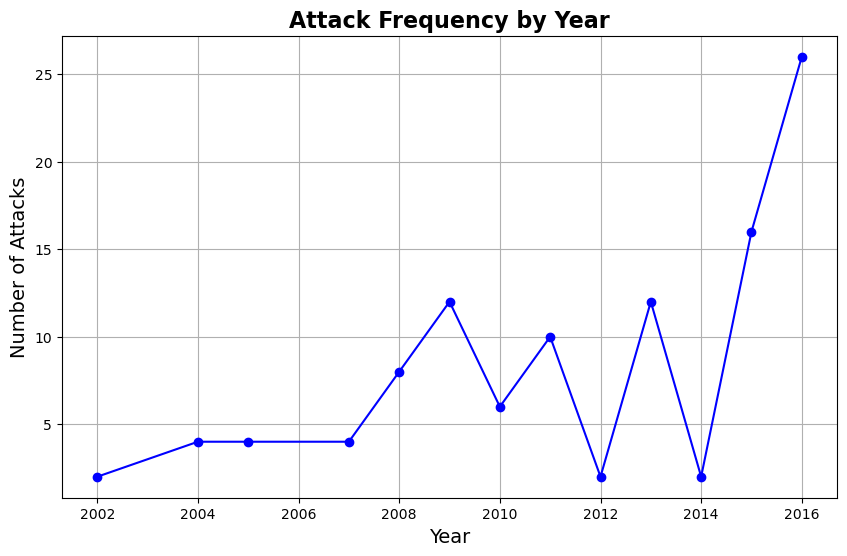

In [43]:
#plot yearly trend
yearly_trend = data_set['Year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
yearly_trend.plot(kind='line', marker='o', color='b')
plt.title('Attack Frequency by Year', fontsize = 16, fontweight = 'bold')
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Number of Attacks', fontsize = 14)
plt.grid(True)
plt.show()

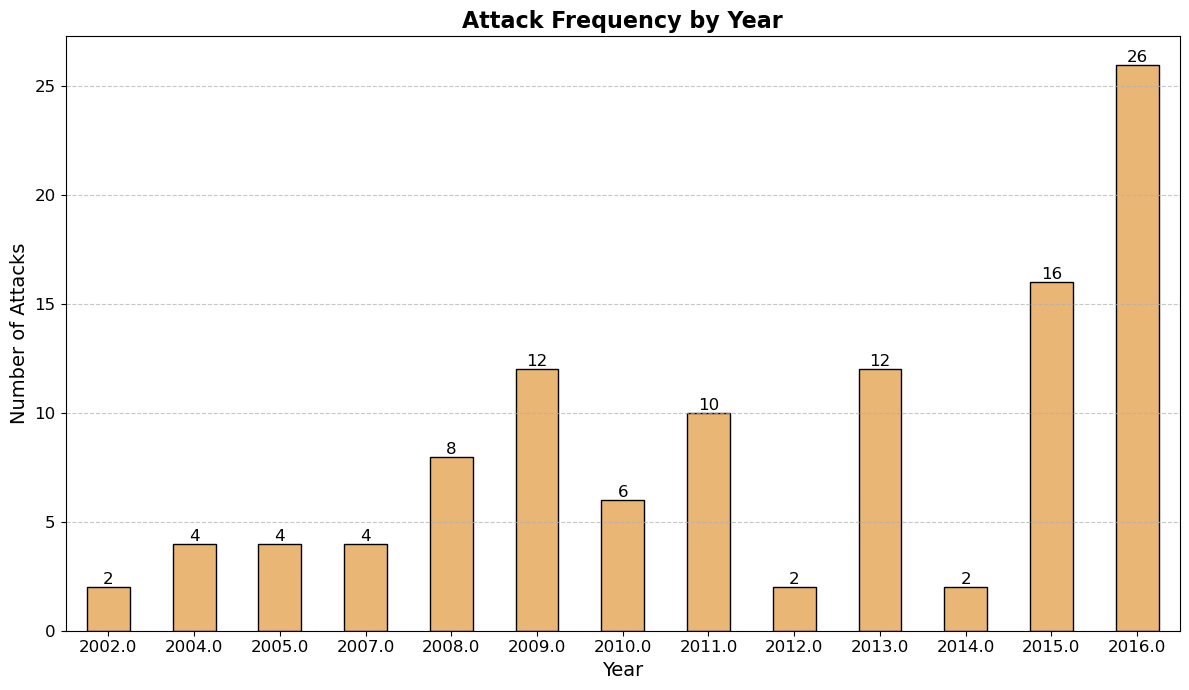

In [44]:
monthly_trend = data_set['Year'].value_counts().sort_index()
plt.figure(figsize=(12,7))
bars = monthly_trend.plot(kind='bar', color='#eab676', edgecolor='black')
plt.title('Attack Frequency by Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Attacks', fontsize=14)

# Add total count on top of each bar
for bar in bars.patches:
    plt.annotate(f'{int(bar.get_height())}', 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='bottom', fontsize=12, color='black')

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
# grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Key Finding: There could be noticeable spikes in certain years that correspond to increased political or military conflicts, changes in government, or other factors. A declining trend may reflect improved security measures or political stability.

Insight: The plot of attack frequency by year shows the total number of suicide bombings per year over a period.

In [45]:
data_set['Month'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 988 entries, 0 to 987
Series name: Month
Non-Null Count  Dtype 
--------------  ----- 
988 non-null    object
dtypes: object(1)
memory usage: 7.8+ KB


In [46]:
# For visualization convert 'Month' column to numeric, coercing errors (non-numeric entries) to NaN
data_set['Month'] = pd.to_numeric(data_set['Month'], errors='coerce')

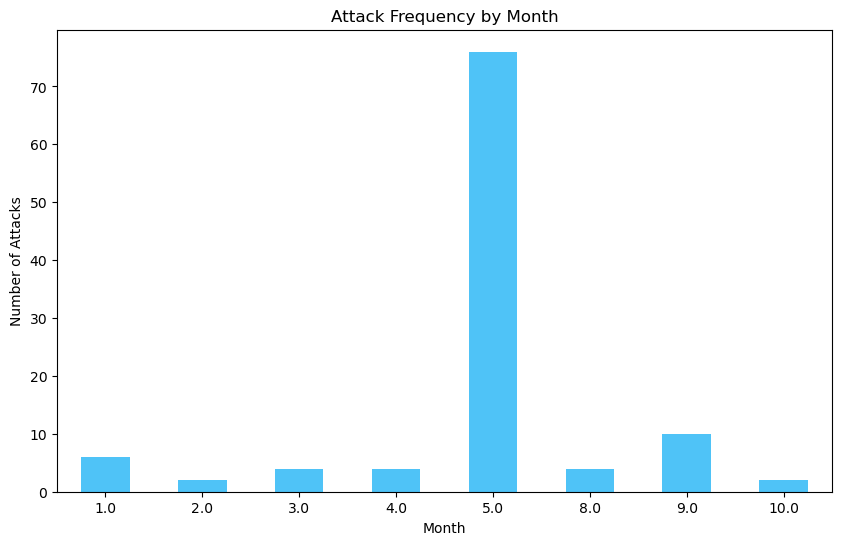

In [47]:
# monthly trend
monthly_trend = data_set['Month'].value_counts().sort_index()
plt.figure(figsize=(10,6))
monthly_trend.plot(kind='bar', color='#4FC3F7')
plt.title('Attack Frequency by Month')
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=0)
plt.show()

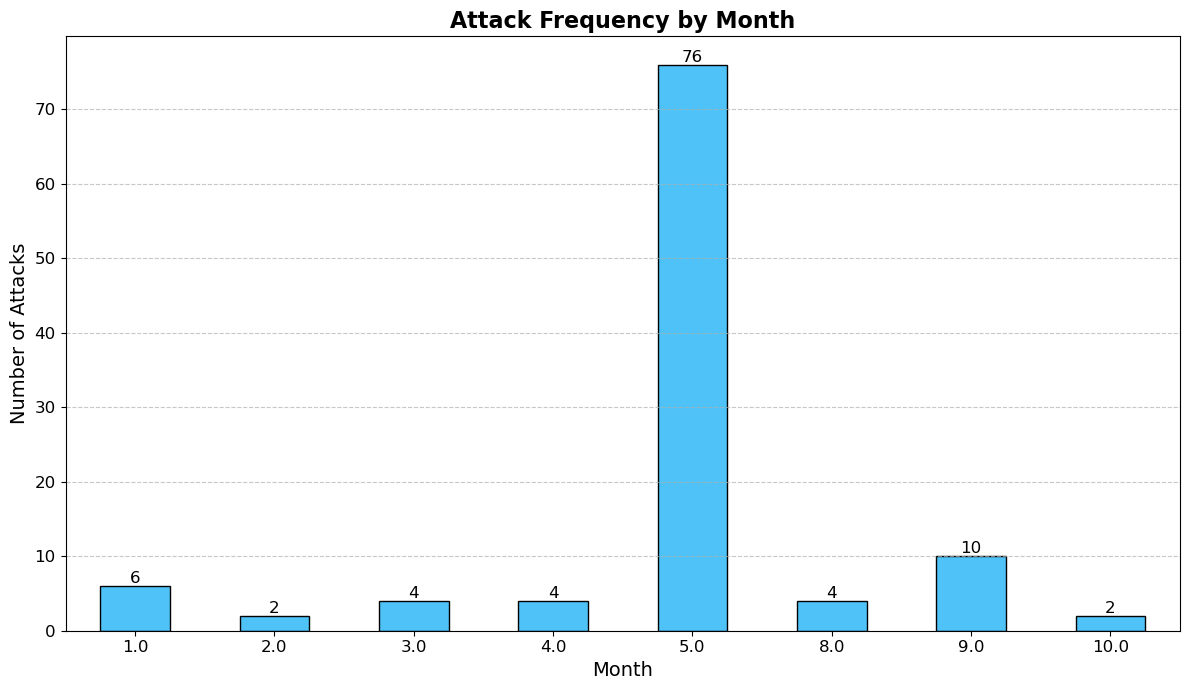

In [48]:
monthly_trend = data_set['Month'].value_counts().sort_index()
plt.figure(figsize=(12,7))
bars = monthly_trend.plot(kind='bar', color='#4FC3F7', edgecolor='black')
plt.title('Attack Frequency by Month', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Attacks', fontsize=14)

# Add total count on top of each bar
for bar in bars.patches:
    plt.annotate(f'{int(bar.get_height())}', 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='bottom', fontsize=12, color='black')

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
# grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Key Finding: The frequency of attacks tends to vary across months. Peaks in certain months could suggest that attacks might be concentrated around certain times of the year, possibly linked to political, religious, or social events.

Insight: The bar plot illustrates the distribution of suicide bombing attacks across different months. If a specific month stands out with higher attack frequency, it could indicate seasonal or event-based trends related to these attacks.

City-wise and Province-wise analysis

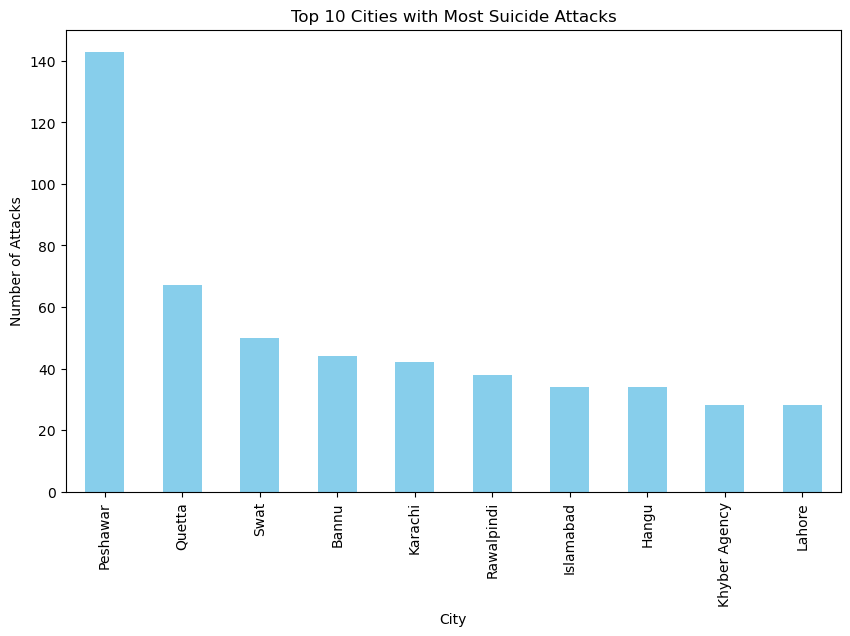

In [49]:
city_wise_attacks = data_set['City'].value_counts()

# city-wise attack frequency
plt.figure(figsize=(10,6))
city_wise_attacks.head(10).plot(kind='bar', color='skyblue')  # only for top 10 cities
plt.title('Top 10 Cities with Most Suicide Attacks')
plt.xlabel('City')
plt.ylabel('Number of Attacks')
plt.show()

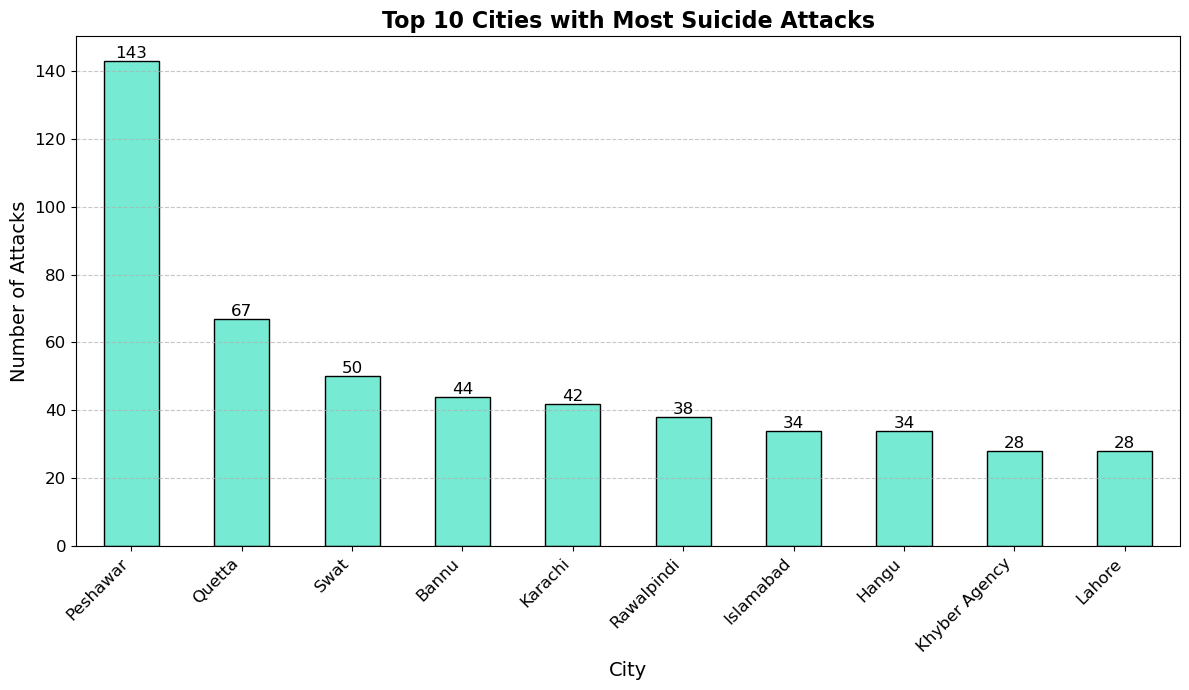

In [50]:
# Get the count of suicide attacks per city
city_wise_attacks = data_set['City'].value_counts()

plt.figure(figsize=(12, 7))

# Plot the top 10 cities with most suicide attacks as a bar chart
bars = city_wise_attacks.head(10).plot(kind='bar', color='#76ead3', edgecolor='black')
plt.title('Top 10 Cities with Most Suicide Attacks', fontsize=16, fontweight='bold')
plt.xlabel('City', fontsize=14)
plt.ylabel('Number of Attacks', fontsize=14)

# Annotate each bar with the exact number of attacks by placing the text above the bar
for bar in bars.patches:
    plt.annotate(f'{int(bar.get_height())}',  
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),  
                 ha='center', va='bottom', fontsize=12, color='black')  

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

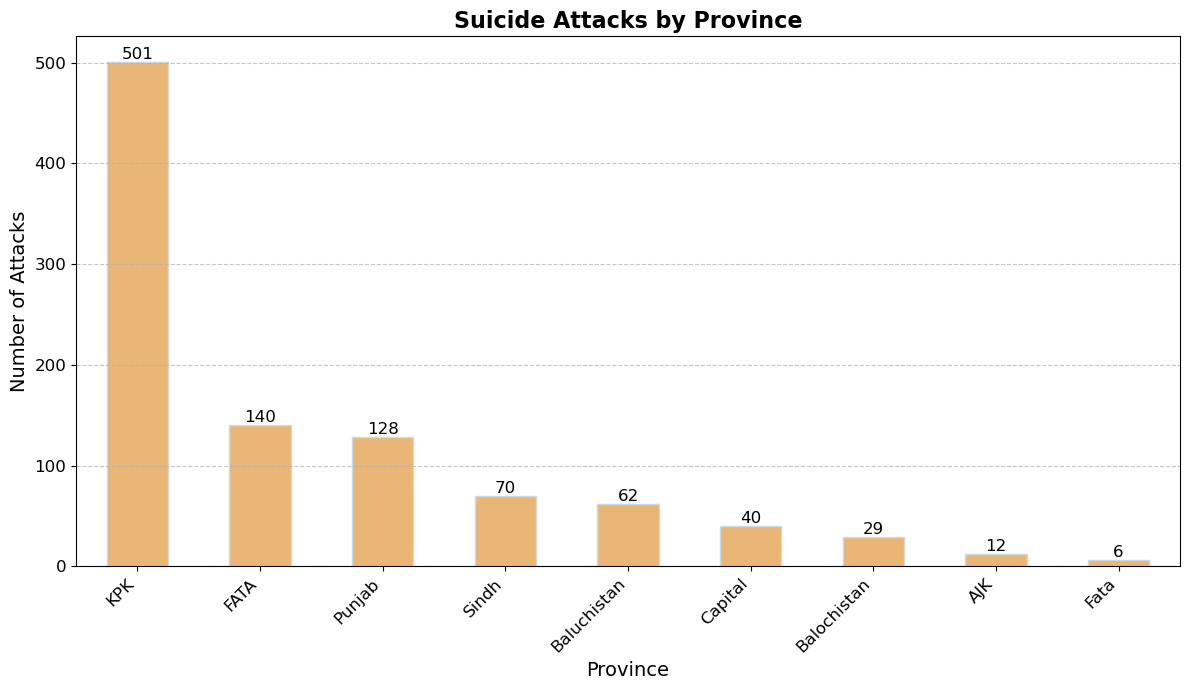

In [51]:
# Get the count of suicide attacks per city
province_wise_attacks = data_set['Province'].value_counts()

plt.figure(figsize=(12, 7))

# Plot the top 10 cities with most suicide attacks as a bar chart
bars = province_wise_attacks.plot(kind='bar', color='#eab676', edgecolor='#cbdbdf')
plt.title('Suicide Attacks by Province', fontsize=16, fontweight='bold')
plt.xlabel('Province', fontsize=14)
plt.ylabel('Number of Attacks', fontsize=14)

# Annotate each bar with the exact number of attacks by placing the text above the bar
for bar in bars.patches:
    plt.annotate(f'{int(bar.get_height())}',  
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),  
                 ha='center', va='bottom', fontsize=12, color='black')  

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Key Finding: Some provinces may exhibit a disproportionately higher number of attacks, indicating these regions are more vulnerable or are hotspots for such incidents. This can inform regional policies and focus for law enforcement or peace-building efforts.

Insight: This bar chart highlights the regional distribution of suicide bombings across different provinces.

In [52]:
import folium
from folium.plugins import MarkerCluster

# Create a base map centered on Pakistan
pakistan_map = folium.Map(location=[30.3753, 69.3451], zoom_start=5)

# Create a marker cluster
marker_cluster = MarkerCluster().add_to(pakistan_map)

# Add markers for each attack location
for index, row in data_set.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']],
                  popup=f"City: {row['City']}, Province: {row['Province']}, Killed Min: {row['Killed Min']}, Injured Min: {row['Injured Min']}").add_to(marker_cluster)

# Display the map
pakistan_map


Created a map centered on Pakistan.

Plot markers at each attack location based on latitude and longitude.

Display information in the popup, including city, province, number of people killed, and injured.

# Analyze patterns in the types of targets (e.g., civilians, military, government buildings)

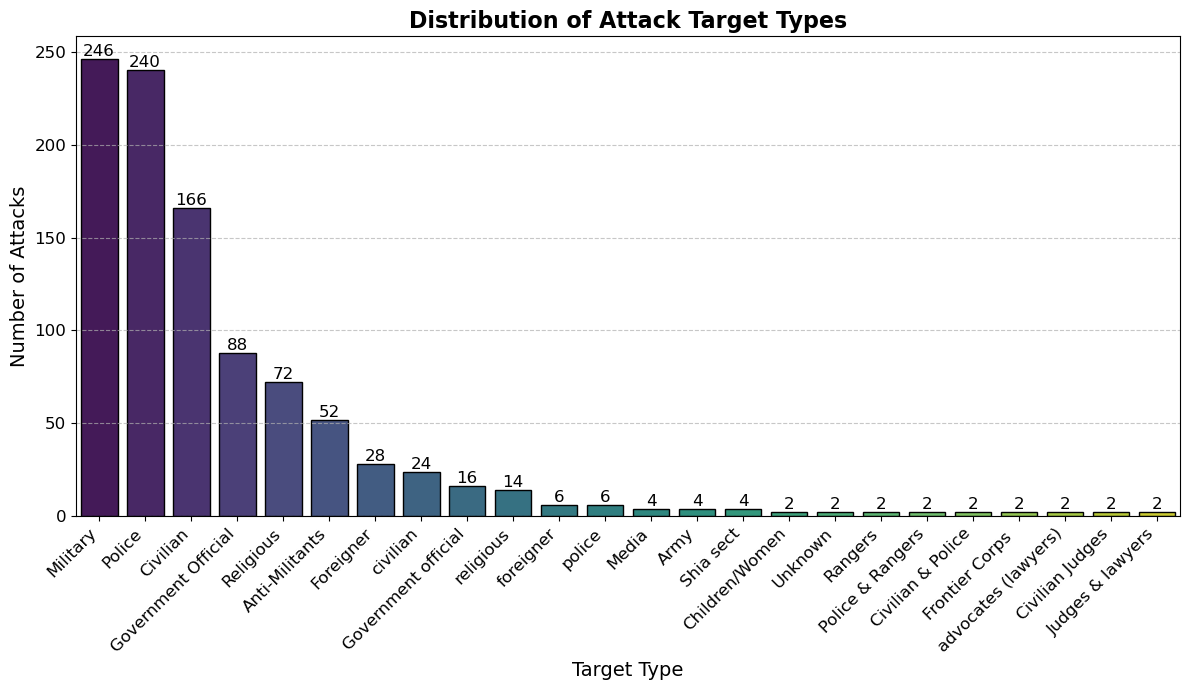

In [53]:
target_type_counts = data_set['Target Type'].value_counts()
plt.figure(figsize=(12, 7))
bars = sns.barplot(x=target_type_counts.index, y=target_type_counts.values, palette='viridis', edgecolor='black')

# Add the total count on top of each bar
for bar in bars.patches:
    bars.annotate(f'{int(bar.get_height())}', 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='bottom', fontsize=12, color='black')

plt.title('Distribution of Attack Target Types', fontsize=16, fontweight='bold')
plt.xlabel('Target Type', fontsize=14)
plt.ylabel('Number of Attacks', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Key Finding: Identifying patterns in attack methods and targets can be crucial for preventive measures. For instance, if civilians are consistently the most frequent targets, there may be a need for increased civilian protection and awareness programs.

Insight: The stacked bar or pie chart showing attack types and targets can reveal the most common types of attacks (e.g., explosions, gun attacks) and the most frequent targets (e.g., civilians, military personnel).

# Analyze the impact of the attacks by looking at the number of injuries.

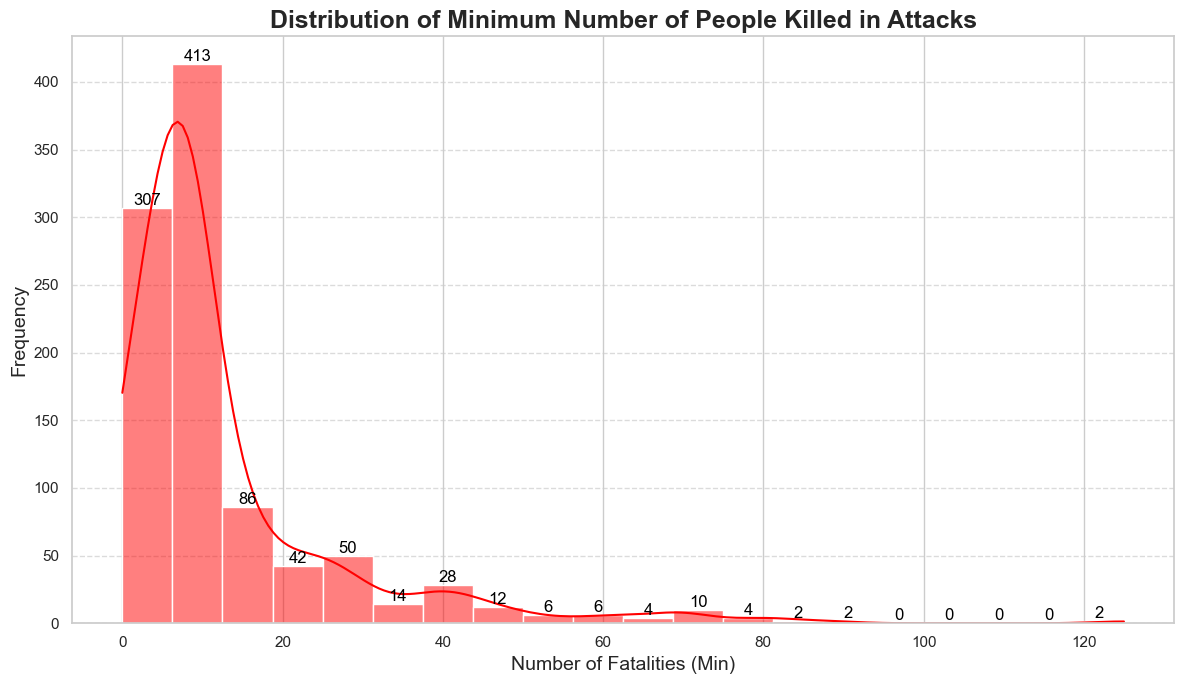

In [54]:
sns.set(style="whitegrid")

# Plot histogram for 'Killed Min'
plt.figure(figsize=(12, 7))
hist_plot = sns.histplot(data_set['Killed Min'], bins=20, color='red', kde=True)

# count annotations
for patch in hist_plot.patches:
    plt.annotate(f'{int(patch.get_height())}', 
                 (patch.get_x() + patch.get_width() / 2, patch.get_height()), 
                 ha='center', va='bottom', fontsize=12, color='black')

plt.title('Distribution of Minimum Number of People Killed in Attacks', fontsize=18, fontweight='bold')
plt.xlabel('Number of Fatalities (Min)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


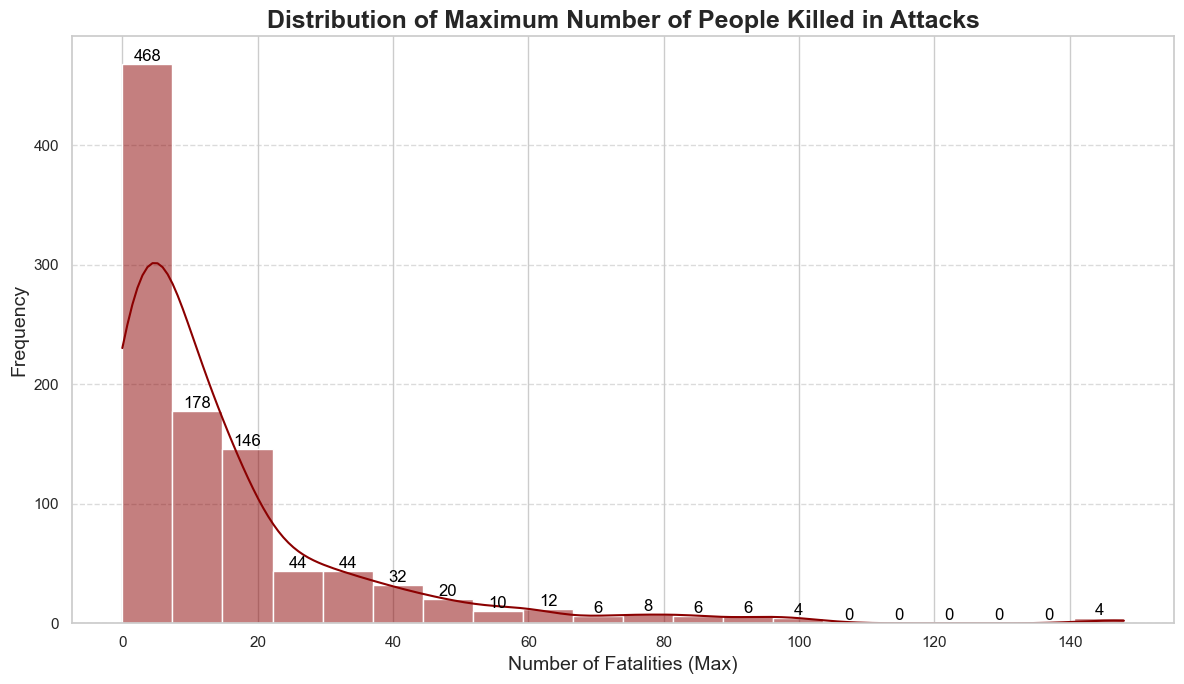

In [55]:
sns.set(style="whitegrid")

# Plot histogram for 'Killed Max'
plt.figure(figsize=(12, 7))
hist_plot = sns.histplot(data_set['Killed Max'], bins=20, color='darkred', kde=True)

# count annotations
for patch in hist_plot.patches:
    plt.annotate(f'{int(patch.get_height())}', 
                 (patch.get_x() + patch.get_width() / 2, patch.get_height()), 
                 ha='center', va='bottom', fontsize=12, color='black')

plt.title('Distribution of Maximum Number of People Killed in Attacks', fontsize=18, fontweight='bold')
plt.xlabel('Number of Fatalities (Max)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

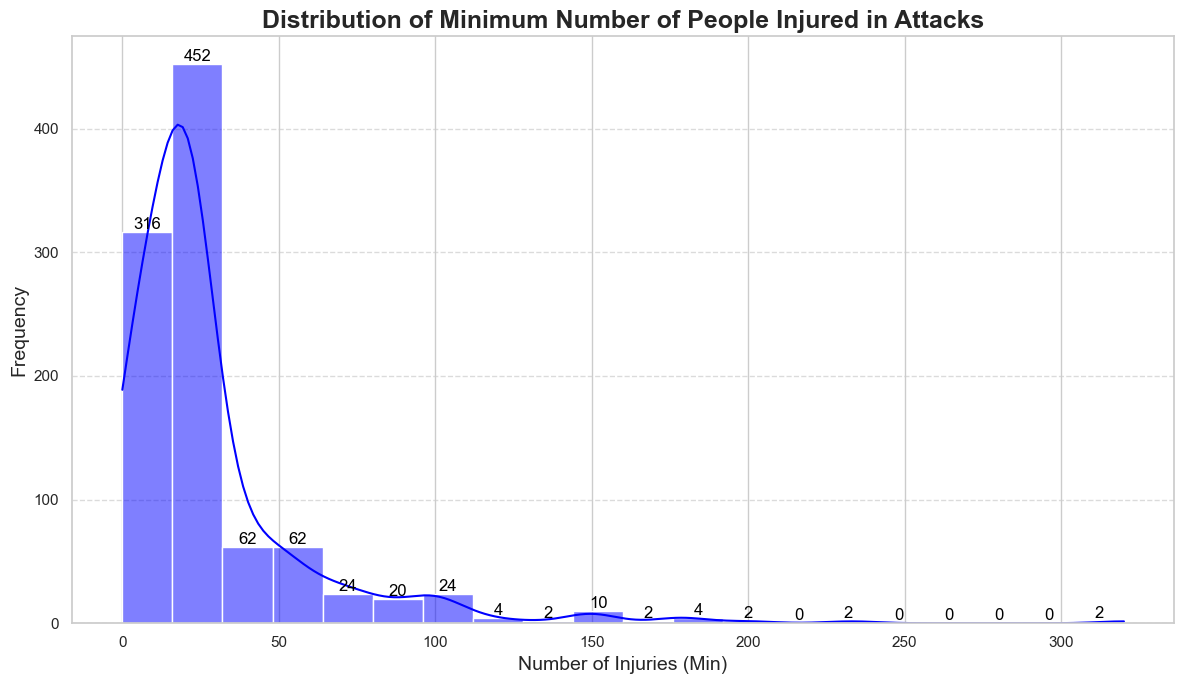

In [56]:

sns.set(style="whitegrid")

# Plot histogram for 'Injured Min'
plt.figure(figsize=(12, 7))
hist_plot = sns.histplot(data_set['Injured Min'], bins=20, color='blue', kde=True)

# count annotations
for patch in hist_plot.patches:
    plt.annotate(f'{int(patch.get_height())}', 
                 (patch.get_x() + patch.get_width() / 2, patch.get_height()), 
                 ha='center', va='bottom', fontsize=12, color='black')

plt.title('Distribution of Minimum Number of People Injured in Attacks', fontsize=18, fontweight='bold')
plt.xlabel('Number of Injuries (Min)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

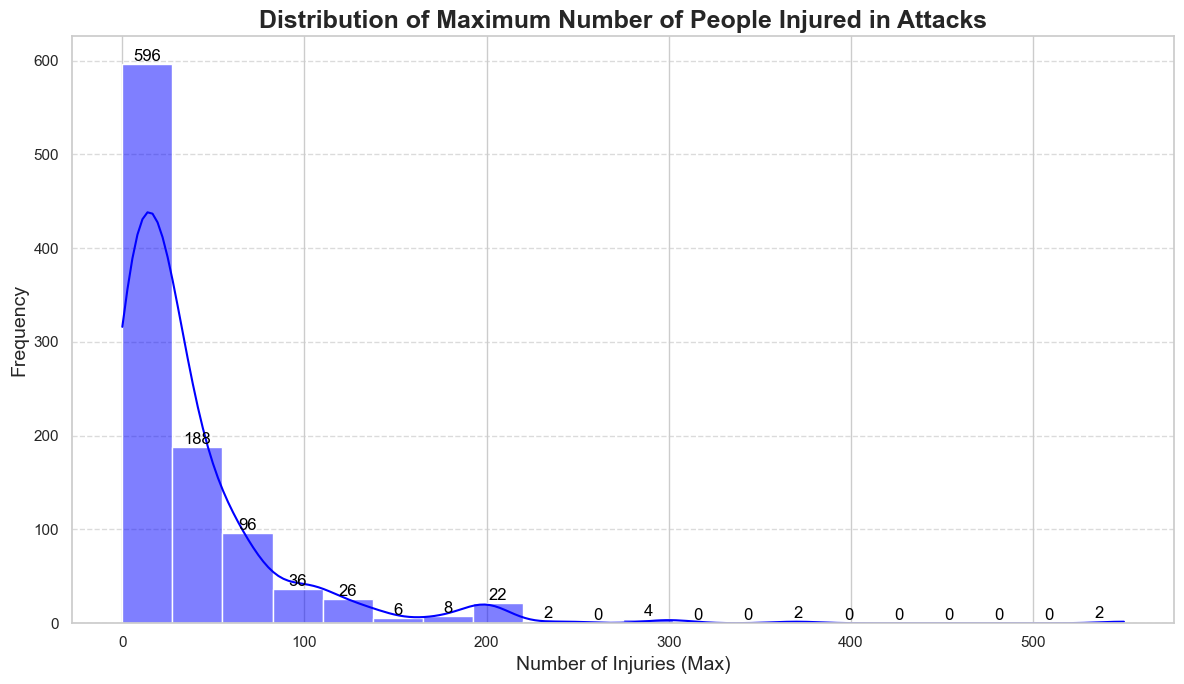

In [57]:
sns.set(style="whitegrid")

# Plot histogram for 'Injured Max'
plt.figure(figsize=(12, 7))
hist_plot = sns.histplot(data_set['Injured Max'], bins=20, color='blue', kde=True)

# count annotations
for patch in hist_plot.patches:
    plt.annotate(f'{int(patch.get_height())}', 
                 (patch.get_x() + patch.get_width() / 2, patch.get_height()), 
                 ha='center', va='bottom', fontsize=12, color='black')

plt.title('Distribution of Maximum Number of People Injured in Attacks', fontsize=18, fontweight='bold')
plt.xlabel('Number of Injuries (Max)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [58]:
print("Summary Statistics for Killed Min:")
print(data_set['Killed Min'].describe())

print("\nSummary Statistics for Killed Max:")
print(data_set['Killed Max'].describe())

print("\nSummary Statistics for Injured Min:")
print(data_set['Injured Min'].describe())

print("\nSummary Statistics for Injured Max:")
print(data_set['Injured Max'].describe())


Summary Statistics for Killed Min:
count    988.000000
mean      12.783401
std       15.104890
min        0.000000
25%        5.000000
50%        8.000000
75%       14.000000
max      125.000000
Name: Killed Min, dtype: float64

Summary Statistics for Killed Max:
count    988.000000
mean      15.253138
std       19.957268
min        0.000000
25%        3.000000
50%        8.000000
75%       18.000000
max      148.000000
Name: Killed Max, dtype: float64

Summary Statistics for Injured Min:
count    988.000000
mean      28.449393
std       33.517774
min        0.000000
25%       10.000000
50%       20.000000
75%       30.000000
max      320.000000
Name: Injured Min, dtype: float64

Summary Statistics for Injured Max:
count    988.000000
mean      38.392713
std       52.695370
min        0.000000
25%        8.000000
50%       23.000000
75%       47.000000
max      550.000000
Name: Injured Max, dtype: float64


# Identify patterns in the types of targets (e.g., civilians, military, government) and analyze how frequently each target type was attacked.

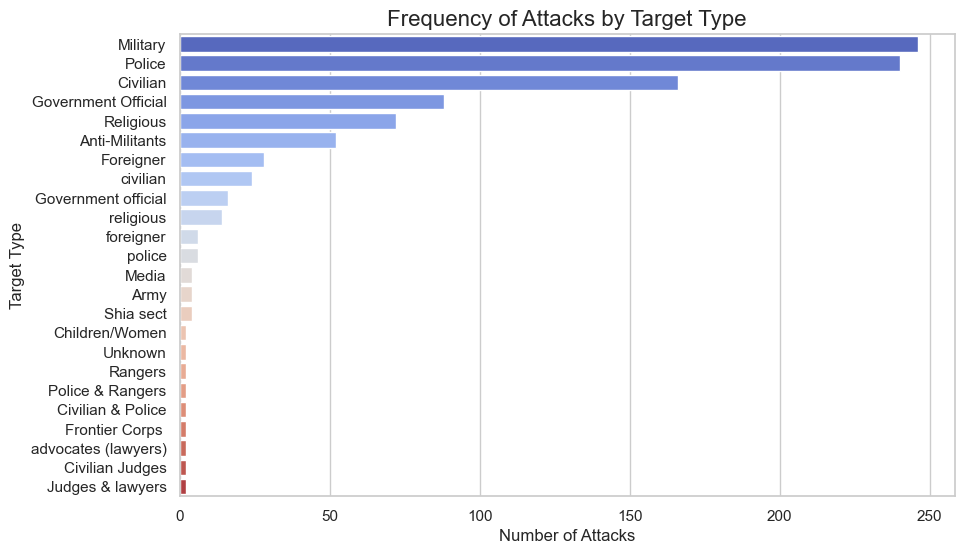

In [59]:
target_type_counts = data_set['Target Type'].value_counts()

# Horizontal bar plot for target types
plt.figure(figsize=(10, 6))
sns.barplot(x=target_type_counts.values, y=target_type_counts.index, palette='coolwarm')
plt.title('Frequency of Attacks by Target Type', fontsize=16)
plt.xlabel('Number of Attacks', fontsize=12)
plt.ylabel('Target Type', fontsize=12)
plt.show()

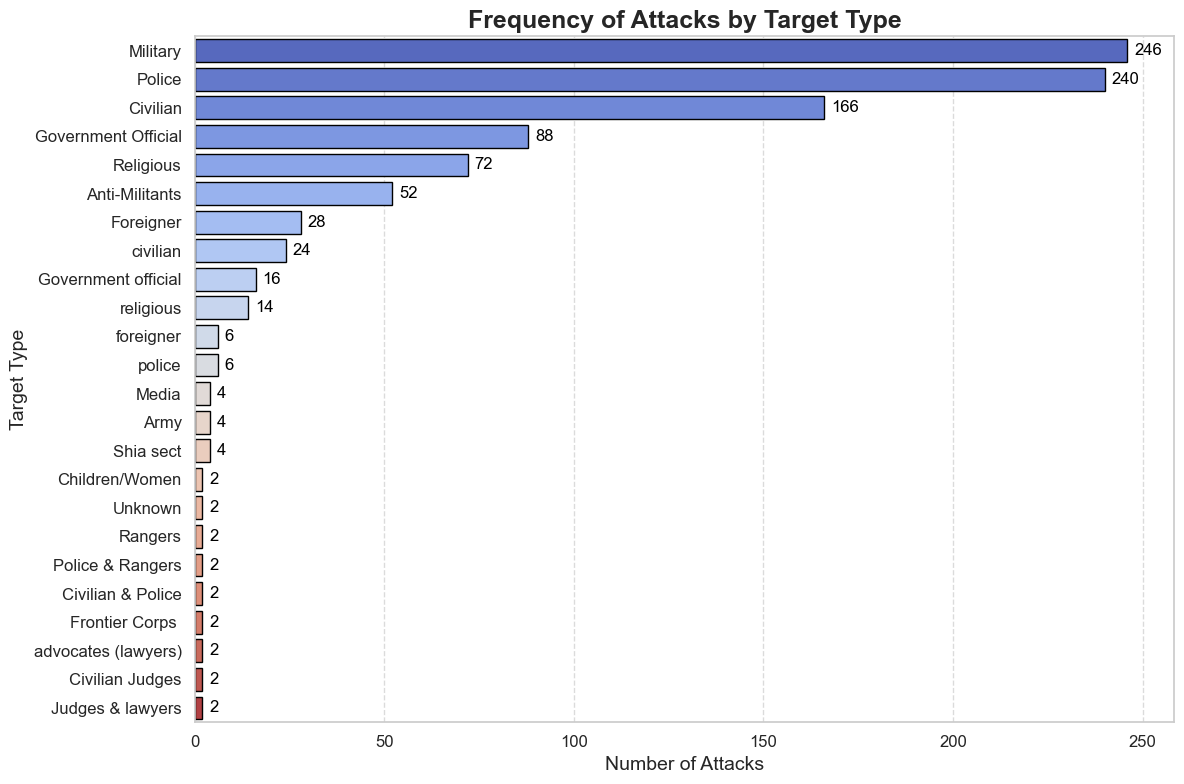

In [60]:
target_type_counts = data_set['Target Type'].value_counts()


plt.figure(figsize=(12, 8))
bars = sns.barplot(x=target_type_counts.values, y=target_type_counts.index, palette='coolwarm', edgecolor='black')

# total count on top of each bar
for bar in bars.patches:
    plt.annotate(f'{int(bar.get_width())}', 
                 (bar.get_width(), bar.get_y() + bar.get_height() / 2),  # Positioning the annotation at the end of the bar
                 ha='left', va='center', fontsize=12, color='black', xytext=(5, 0), textcoords='offset points')


plt.title('Frequency of Attacks by Target Type', fontsize=18, fontweight='bold')
plt.xlabel('Number of Attacks', fontsize=14)
plt.ylabel('Target Type', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Casualties Analysis. (the number of fatalities (killed) and injuries (injured))

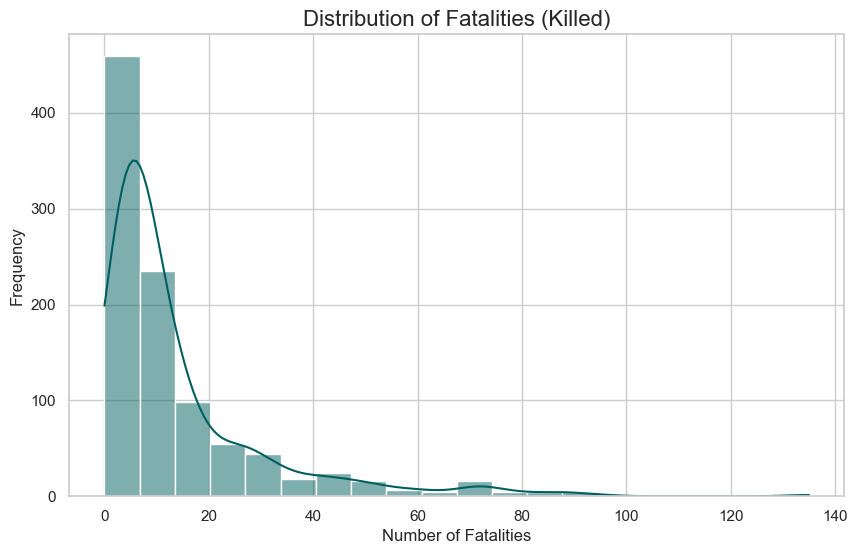

In [61]:
# Calculate total fatalities
data_set['Total Killed'] = (data_set['Killed Min'] + data_set['Killed Max']) / 2

# Plot the distribution of fatalities
plt.figure(figsize=(10,6))
sns.histplot(data_set['Total Killed'], bins=20, kde=True, color='#005F60')
plt.title('Distribution of Fatalities (Killed)', fontsize=16)
plt.xlabel('Number of Fatalities', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


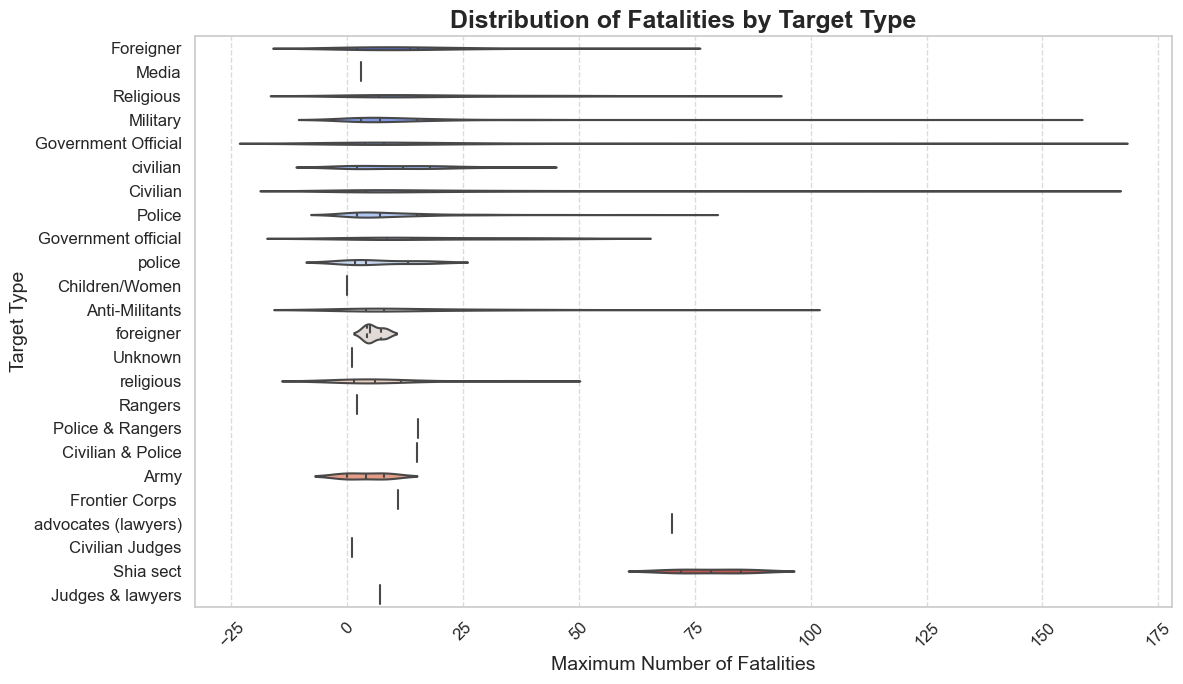

In [62]:
# Analyzing Fatalities Distribution
# Violin plot for fatalities distribution by Target Type
plt.figure(figsize=(12, 7))
sns.violinplot(y='Target Type', x='Killed Max', data=data_set, palette='coolwarm', inner='quartile')

# Customizing plot aesthetics
plt.title('Distribution of Fatalities by Target Type', fontsize=18, fontweight='bold')
plt.xlabel('Maximum Number of Fatalities', fontsize=14)
plt.ylabel('Target Type', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Gridlines for x-axis
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Tight layout for spacing
plt.tight_layout()

plt.show()


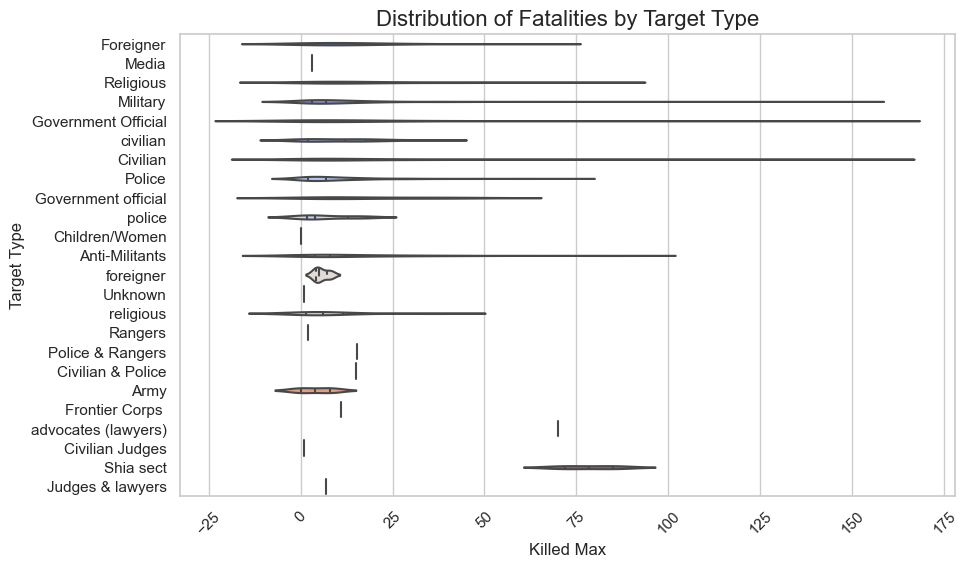

In [63]:
# distribution of injuries

# Violin plot for fatalities distribution by Target Type
plt.figure(figsize=(10, 6))
sns.violinplot(x='Killed Max', y='Target Type', data=data_set, palette='coolwarm', inner='quartile')
plt.title('Distribution of Fatalities by Target Type', fontsize=16)
plt.xticks(rotation=45)
plt.show()

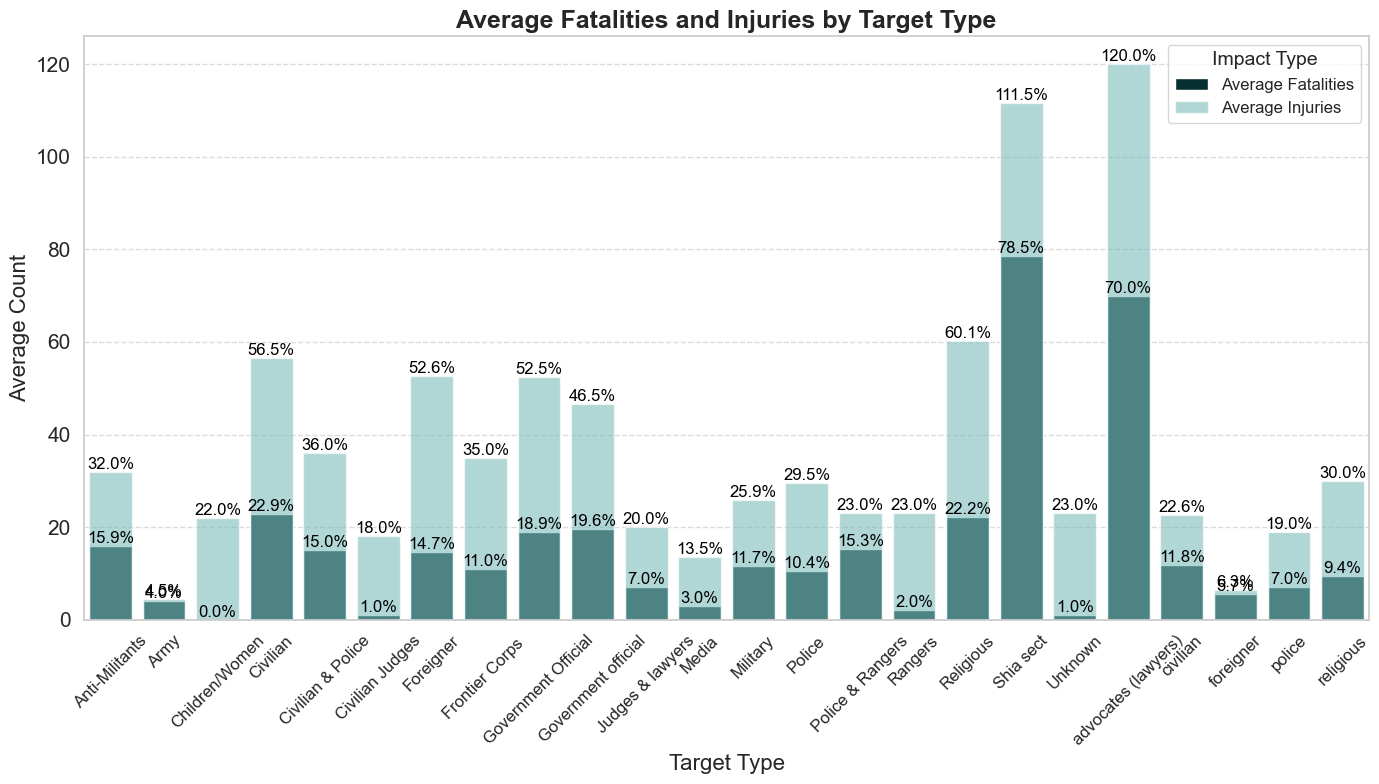

In [64]:
# analyzing the impact of attacks

# Calculate average injuries and fatalities per attack type
average_impact = data_set.groupby('Target Type')[['Killed Max', 'Injured Max']].mean().reset_index()

plt.figure(figsize=(14, 8))  
bars_killed = sns.barplot(x='Target Type', y='Killed Max', data=average_impact, color='#003737', label='Average Fatalities')
bars_injured = sns.barplot(x='Target Type', y='Injured Max', data=average_impact, color='#73C5C5', label='Average Injuries', alpha=0.6)

# percentage values on top of each bar
for bar in bars_killed.patches:
    plt.annotate(f'{bar.get_height():.1f}%', 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='bottom', fontsize=12, color='black')



plt.title('Average Fatalities and Injuries by Target Type', fontsize=18, fontweight='bold')
plt.xlabel('Target Type', fontsize=16)
plt.ylabel('Average Count', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=15)
plt.legend(title='Impact Type', fontsize=12, title_fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Geo-mapping 

In [65]:
import folium

#base map centered around Pakistan
m = folium.Map(location=[30.3753, 69.3451], zoom_start=5)

# Add points for each attack location
for idx, row in data_set.iterrows():
    folium.CircleMarker(
        location=(row['Latitude'], row['Longitude']),
        radius=4,  # Adjust the radius based on your preference
        color='red',
        fill=True,
        fill_opacity=0.6,
        popup=f"Date: {row['Date']}<br>Target Type: {row['Target Type']}<br>Killed Min: {row['Killed Min']}",
    ).add_to(m)

# Save the map to an HTML file
m.save('attack_locations_map.html')
#for display
m


# Trend Analysis

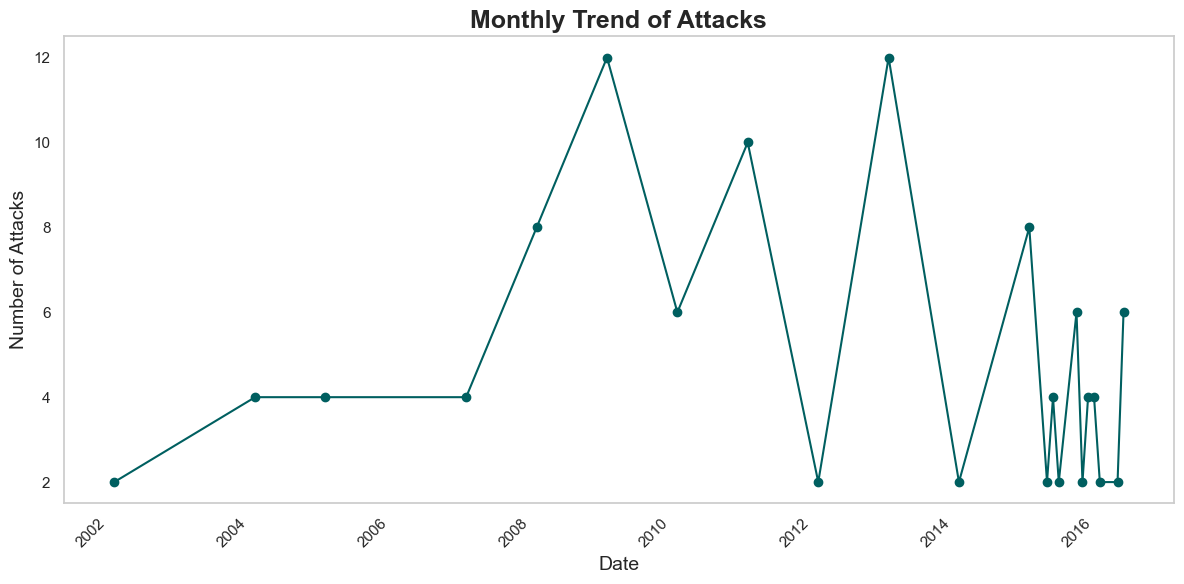

In [66]:
# Aggregate data by month for the number of attacks
monthly_attacks = data_set.groupby(['Year', 'Month']).size()

# Convert to DataFrame for easier plotting
monthly_attacks_df = monthly_attacks.reset_index(name='Number of Attacks')

# Create a new column for a datetime object
monthly_attacks_df['Date'] = pd.to_datetime(monthly_attacks_df[['Year', 'Month']].assign(DAY=1))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_attacks_df['Date'], monthly_attacks_df['Number of Attacks'], marker='o', linestyle='-', color='#005F60')
plt.title('Monthly Trend of Attacks', fontsize=18, fontweight = 'bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Attacks', fontsize=14)
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# Now Find Correlations

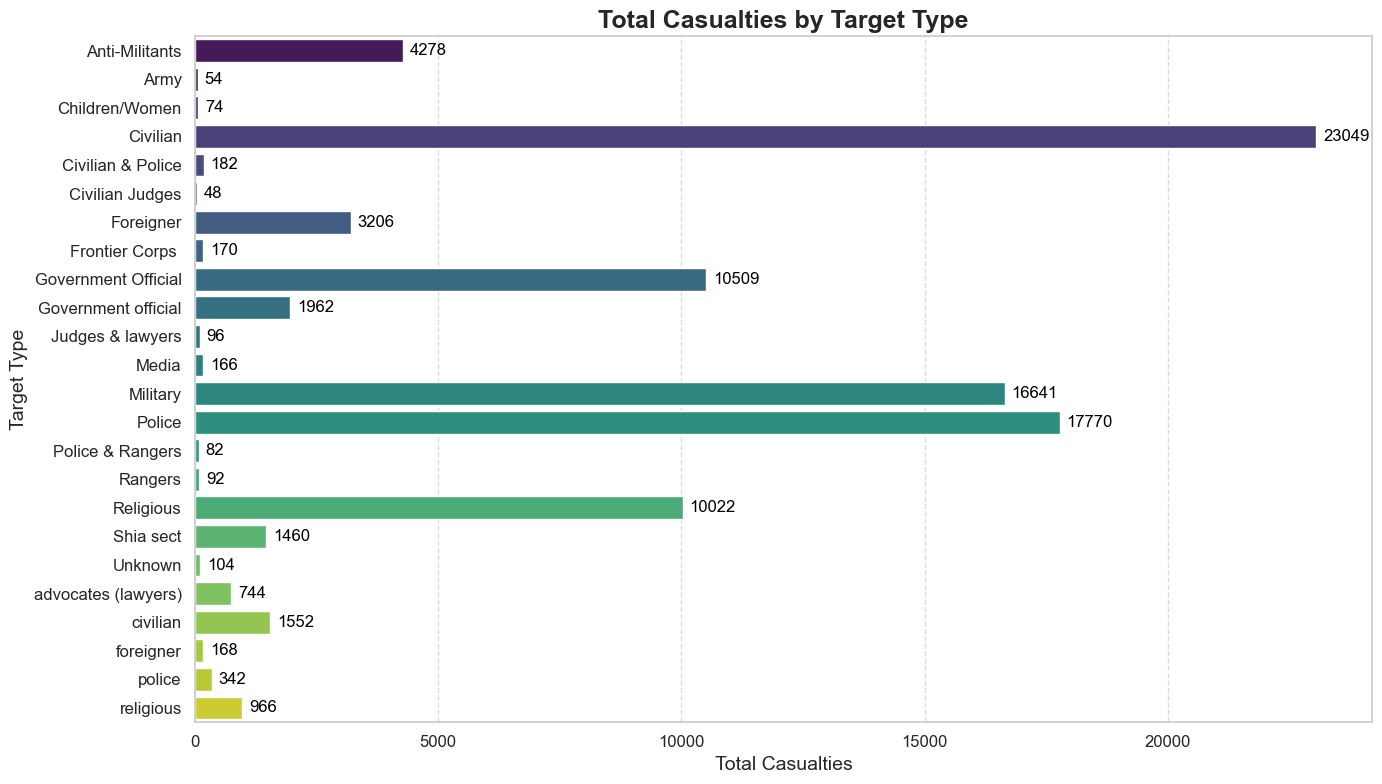

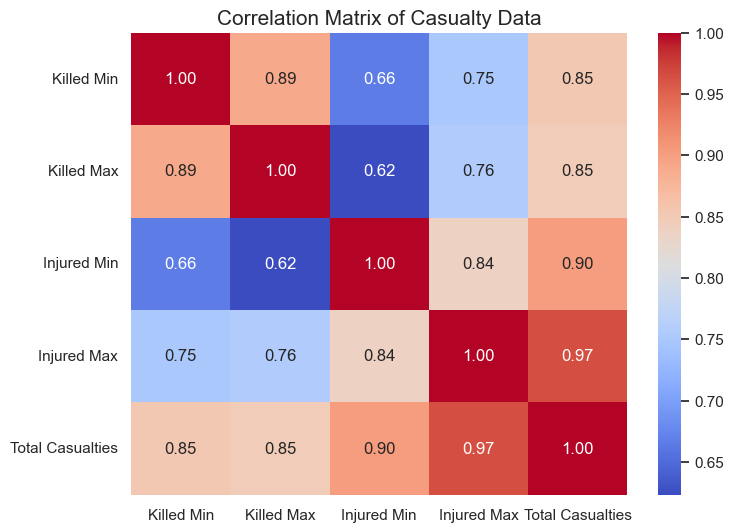

In [67]:
# Calculate the total casualties for each attack type
data_set['Total Casualties'] = data_set['Killed Min'] + data_set['Killed Max'] + data_set['Injured Min'] + data_set['Injured Max']
casualties_by_target = data_set.groupby('Target Type')['Total Casualties'].sum().reset_index()


plt.figure(figsize=(14, 8))  
bar_plot = sns.barplot(x='Total Casualties', y='Target Type', data=casualties_by_target, palette='viridis')

# total count for each bar
for bar in bar_plot.patches:
    total = f'{int(bar.get_width())}' 
    plt.annotate(total, 
                 (bar.get_width(), bar.get_y() + bar.get_height() / 2), 
                 ha='left', va='center', fontsize=12, color='black', xytext=(5, 0), textcoords='offset points')

plt.title('Total Casualties by Target Type', fontsize=18, fontweight='bold')
plt.xlabel('Total Casualties', fontsize=14)
plt.ylabel('Target Type', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



# Calculate correlations between numerical features
correlation_matrix = data_set[['Killed Min', 'Killed Max', 'Injured Min', 'Injured Max', 'Total Casualties']].corr()

# show a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Casualty Data', fontsize=15)
plt.show()


# Anomalies, Identify unusual patterns or outliers (e.g., unexpected attack spikes).

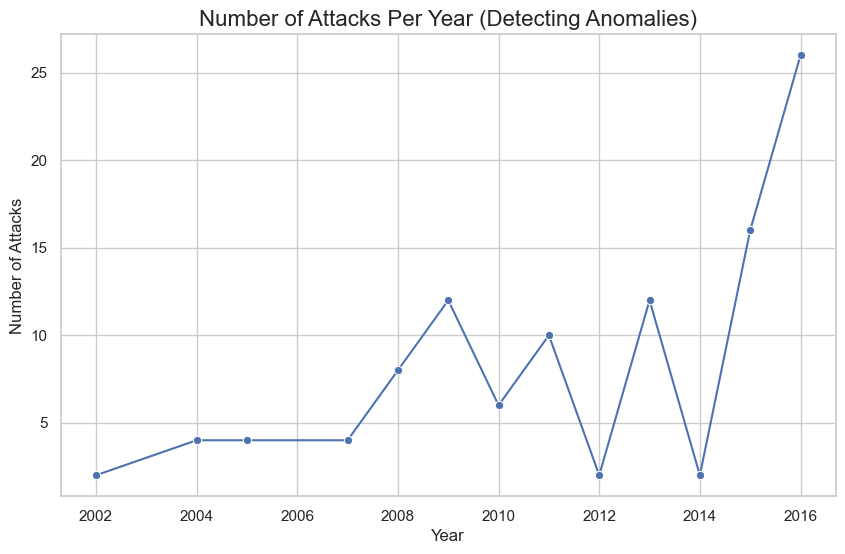

In [68]:
# Plotting the number of attacks per year to detect spikes or anomalies
attacks_per_year = data_set['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=attacks_per_year.index, y=attacks_per_year.values, marker='o')
plt.title('Number of Attacks Per Year (Detecting Anomalies)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.grid(True)
plt.show()

The line plot shows the number of attacks per year, allowing you to detect any spikes or unusual patterns.



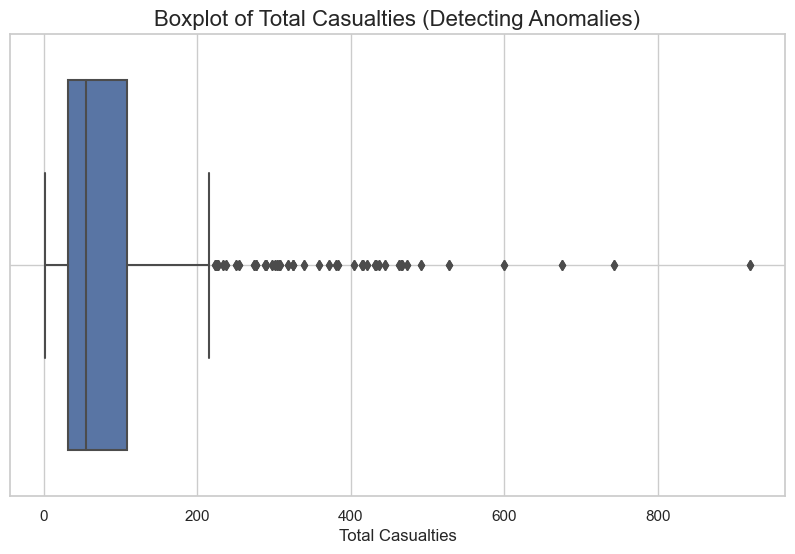

In [69]:
# outliers in total casualties using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_set['Total Casualties'])
plt.title('Boxplot of Total Casualties (Detecting Anomalies)', fontsize=16)
plt.xlabel('Total Casualties')
plt.grid(True)
plt.show()

The boxplot visualizes outliers in total casualties, helping you identify any extreme or anomalous values.

# Find another Correlations – Investigate relationships between variables (e.g., attack type vs casualties).

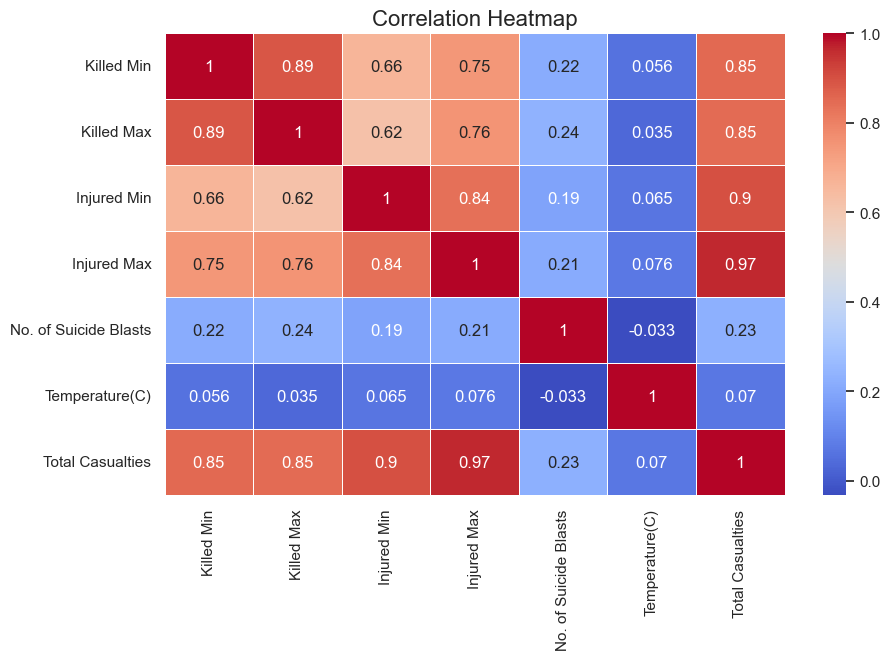

In [70]:
# Select numerical columns to check correlations
numeric_cols = ['Killed Min', 'Killed Max', 'Injured Min', 'Injured Max', 'No. of Suicide Blasts', 'Temperature(C)', 'Total Casualties']

# Calculate the correlation matrix
correlation_matrix = data_set[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


The heatmap displays the correlations between numerical variables such as casualties, injuries, and blasts.

You can investigate whether certain factors, like temperature or attack types, correlate with the number of casualties.

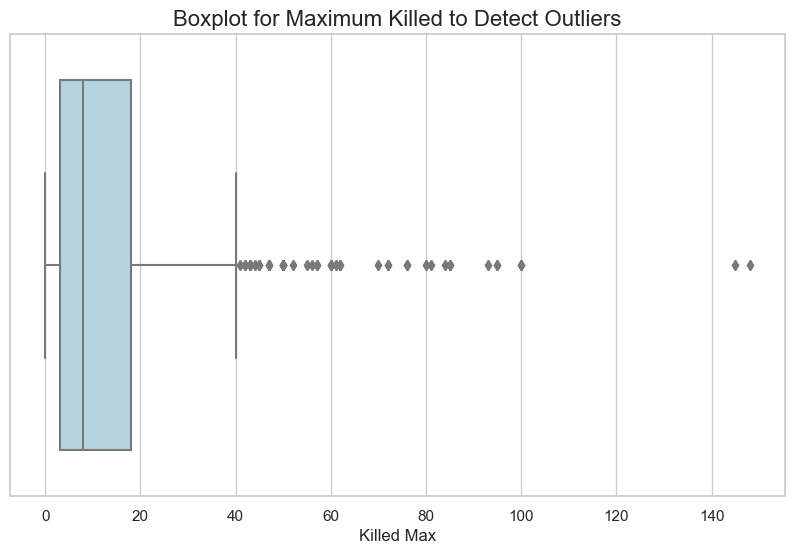

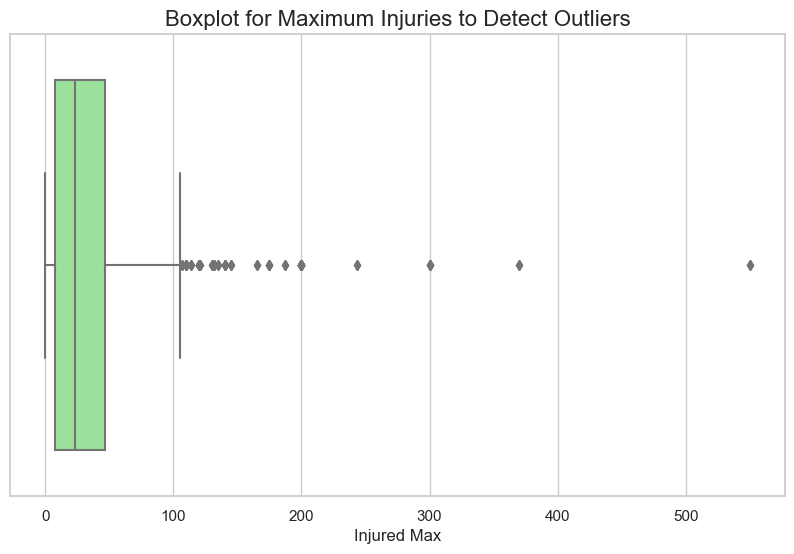

In [71]:
# Plot boxplot for casualties to detect anomalies
plt.figure(figsize=(10, 6))
sns.boxplot(x='Killed Max', data=data_set, color='lightblue')
plt.title('Boxplot for Maximum Killed to Detect Outliers', fontsize=16)
plt.show()

# Plot boxplot for injuries to detect anomalies
plt.figure(figsize=(10, 6))
sns.boxplot(x='Injured Max', data=data_set, color='lightgreen')
plt.title('Boxplot for Maximum Injuries to Detect Outliers', fontsize=16)
plt.show()


# Investigate relationships between variables (attack type vs. casualties) etc.

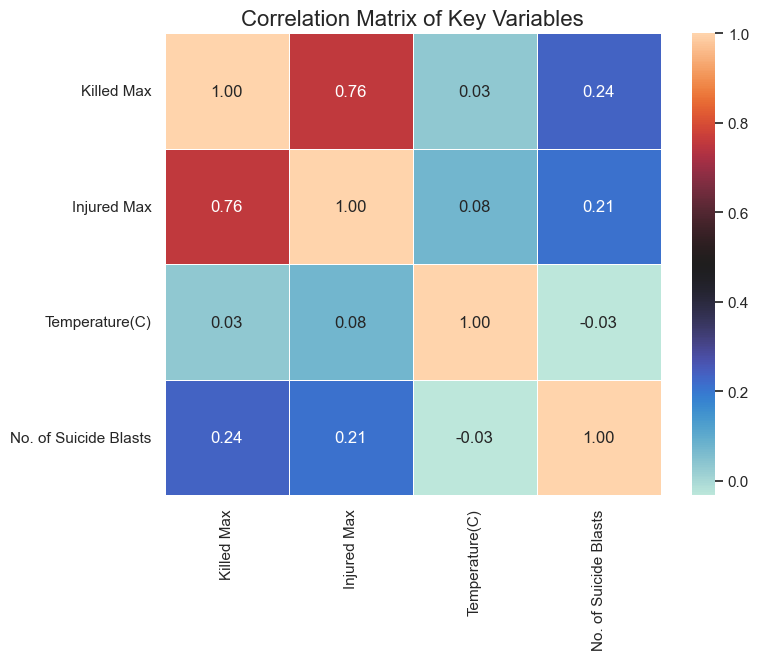

In [72]:
# Select relevant numerical columns for correlation
correlation_data = data_set[['Killed Max', 'Injured Max', 'Temperature(C)', 'No. of Suicide Blasts']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='icefire', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix of Key Variables', fontsize=16)
plt.show()


#  key findings and insights


# 1. Attack Trends Over Time (Yearly Trends)
Key Finding: Suicide bombing attacks likely show fluctuations over the years, with certain periods experiencing a spike in attacks. This could be tied to political instability, military operations, or external conflicts.

Insight: A decline in more recent years could indicate improved security or successful counterterrorism measures.

# 2. Attack Distribution by Month (Seasonal Trends)
Key Finding: Certain months may exhibit higher attack frequencies, potentially indicating seasonal or event-based factors.

Insight: For example, higher frequencies in specific months could be tied to national events, political elections, or religious holidays.

# 3. Geographic Distribution of Attacks (Province/Region Trends)
Key Finding: Attacks are likely concentrated in specific provinces or regions, indicating high-risk areas.

Insight: Provinces with ongoing political tensions or regions near conflict zones are often more affected. This can help direct resources and preventive measures.

# 4. Attack Types and Methods
Key Finding: Common types of attacks (e.g., bombings, gun attacks) and the frequency of their use.

Insight: Identifying the dominant methods can help law enforcement agencies focus on specific prevention techniques, such as bomb detection or crowd control.

# 5. Target Groups
Key Finding: Certain groups or sectors (e.g., civilians, military, government officials) may be more frequent targets.

Insight: This can inform targeted protection and awareness programs for high-risk groups, especially in conflict-prone regions.

# 6. Casualty Trends (Number of Deaths and Injuries Over Time)
Key Finding: Some attacks may result in more casualties than others, reflecting both the intensity of the attacks and the vulnerability of the target areas.

Insight: A downward trend in casualties might suggest improved emergency response, better security, or less frequent attacks.

# 7. Casualty Distribution by Province
Key Finding: Certain provinces or regions might not only see more attacks but also higher casualty rates.

Insight: High casualty regions may need more immediate medical facilities and quicker emergency response systems.

# 8. Correlation Between Attack Frequency and Casualty Numbers
Key Finding: More frequent attacks do not always result in higher casualties; some regions may see fewer attacks but deadlier outcomes.

Insight: This helps to identify particularly lethal attack types or vulnerabilities in high-risk areas.

# 9. Heatmap (Province and Month Correlation)
Key Finding: A correlation between specific months and provinces for attacks.

Insight: Some regions may see attacks during specific months, likely tied to seasonal political or social events, helping forecast potential future threats.

# ---------------------------------------------------------------------------------------------------------

# Recommendations

# 1. Attack Trends Over Time (Yearly Trends)

Recommendation:

Increased Monitoring During Peak Years: If spikes in attacks are observed during specific periods, enhanced security and intelligence efforts should be focused on those times.

Public Awareness Campaigns: Raise public awareness during high-risk periods to ensure citizens remain vigilant.

# 2. Attack Distribution by Month (Seasonal Trends)
Recommendation:

Enhanced Security During High-Risk Months: Security forces should increase their presence and vigilance during months with historically higher attack frequencies.

Event-Specific Security: During periods like elections, religious holidays, or large public gatherings, additional protective measures should be taken to secure vulnerable areas.

Intelligence Gathering: Agencies should focus on gathering intelligence before these high-risk months to preempt potential attacks.

# 3. Geographic Distribution of Attacks (Province/Region Trends)
Recommendation:

Improved Border Control: For provinces near conflict zones or borders, stronger border control and monitoring systems should be implemented to prevent infiltration of hostile groups.

Community Policing: In high-risk regions, developing strong ties between law enforcement and local communities could aid in early detection of threats.


# 4. Attack Types and Methods
Recommendation:

Public Education on Attack Types: Public awareness campaigns can focus on what to do in the event of specific types of attacks

Technology Deployment: Investment in technologies like metal detectors and surveillance in areas prone to explosive attacks can reduce risks.

# 5. Target Groups
Recommendation:

Protection for Vulnerable Groups: Increased security measures should be provided for frequently targeted groups such as civilians in public spaces, government officials, or military installations.

Tailored Crisis Response Plans: Response plans should be customized for protecting high-risk groups like civilians, based on previous attack data.



# 6. Casualty Trends (Number of Deaths and Injuries Over Time)
Recommendation:

Focus on Reducing Lethality of Attacks: Security improvements should focus on reducing the impact of attacks, such as better bomb disposal units, early threat detection, and faster response times.

Emergency Response Enhancements: Regions with higher casualty rates should be equipped with better emergency medical services, quicker hospital access, and trained personnel to minimize loss of life during attacks.

Resilience Programs for Civilians: Introduce programs to train civilians in emergency response and provide mental health support after attacks to reduce the long-term impact.


# 7. Casualty Distribution by Province
Recommendation:

Prioritize Medical Infrastructure: In provinces with high casualty rates, ensure that hospitals and first responders are well-equipped to handle large-scale emergencies.

Rapid Response Teams: Deploy rapid response units with specialized equipment in provinces that face the highest number of casualties.

Civilian Safety Training: Develop training programs in high-casualty provinces to educate civilians on how to respond during attacks (e.g., evacuation plans, first aid training).


# 8. Correlation Between Attack Frequency and Casualty Numbers
Recommendation:

Prevent High-Casualty Events: For provinces experiencing fewer but deadlier attacks, focus on defensive measures such as crowd control during large events and preemptive evacuation plans.

Mitigation Strategies: Introduce countermeasures for attack types that tend to result in high casualty counts, such as bomb threats or coordinated gun attacks, with targeted security operations.

Early Warning Systems: In areas prone to large attacks, implement early warning systems to warn of imminent danger.


# 9. Heatmap (Province and Month Correlation)
Recommendation:

Preemptive Security Based on Seasonal Trends: Where specific provinces experience more attacks in certain months, resources should be allocated ahead of these periods to strengthen defenses and boost preparedness.

Event-Driven Protection Plans: If seasonal peaks correspond with local festivals, political events, or holidays, security plans should be customized to address the increased risk during those events.

Collaborate with Local Communities: Engage local leaders and residents in high-risk provinces to develop community-based security initiatives, enabling faster identification of threats.
